## Check GPU
Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Mon May 27 10:05:44 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.67                 Driver Version: 536.67       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4070      WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   40C    P8              11W / 200W |    630MiB / 12282MiB |      3%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **03.01.2024** with version **YOLOv8.0.196**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196  Python-3.11.7 torch-2.3.0 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)
Setup complete  (24 CPUs, 31.9 GB RAM, 137.5/732.4 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone https://github.com/ultralytics/ultralytics.git
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.4/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

# Preparing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/skripsi/

Mounted at /content/drive
/content/drive/My Drive/skripsi


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

d:\201402022


In [ ]:
!mkdir /content/datasets
%cd /content/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="p0TFf9w5x21SCNA1zpa6")
project = rf.workspace("skripsi-qgw1w").project("handwriting-big-five")
version = project.version(1)
dataset = version.download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 kB 885.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.1 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to handwriting-big-five-1 in yolov8:: 100%|██████████| 2612/2612 [00:00<00:00, 8845.12it/s]


## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Custom Training

In [ ]:
%cd {HOME}
# %cd /content/drive/My Drive/skripsi/

!yolo task=detect mode=train model=yolov8n.pt data="D:/datasets/handwriting-big-five/data.yaml" epochs=200 batch=128 imgsz=640 plots=True patience=0 device=0

d:\201402022


New https://pypi.org/project/ultralytics/8.2.22 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196  Python-3.11.7 torch-2.3.0 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=D:/datasets/handwriting-big-five/data.yaml, epochs=200, patience=0, batch=128, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False

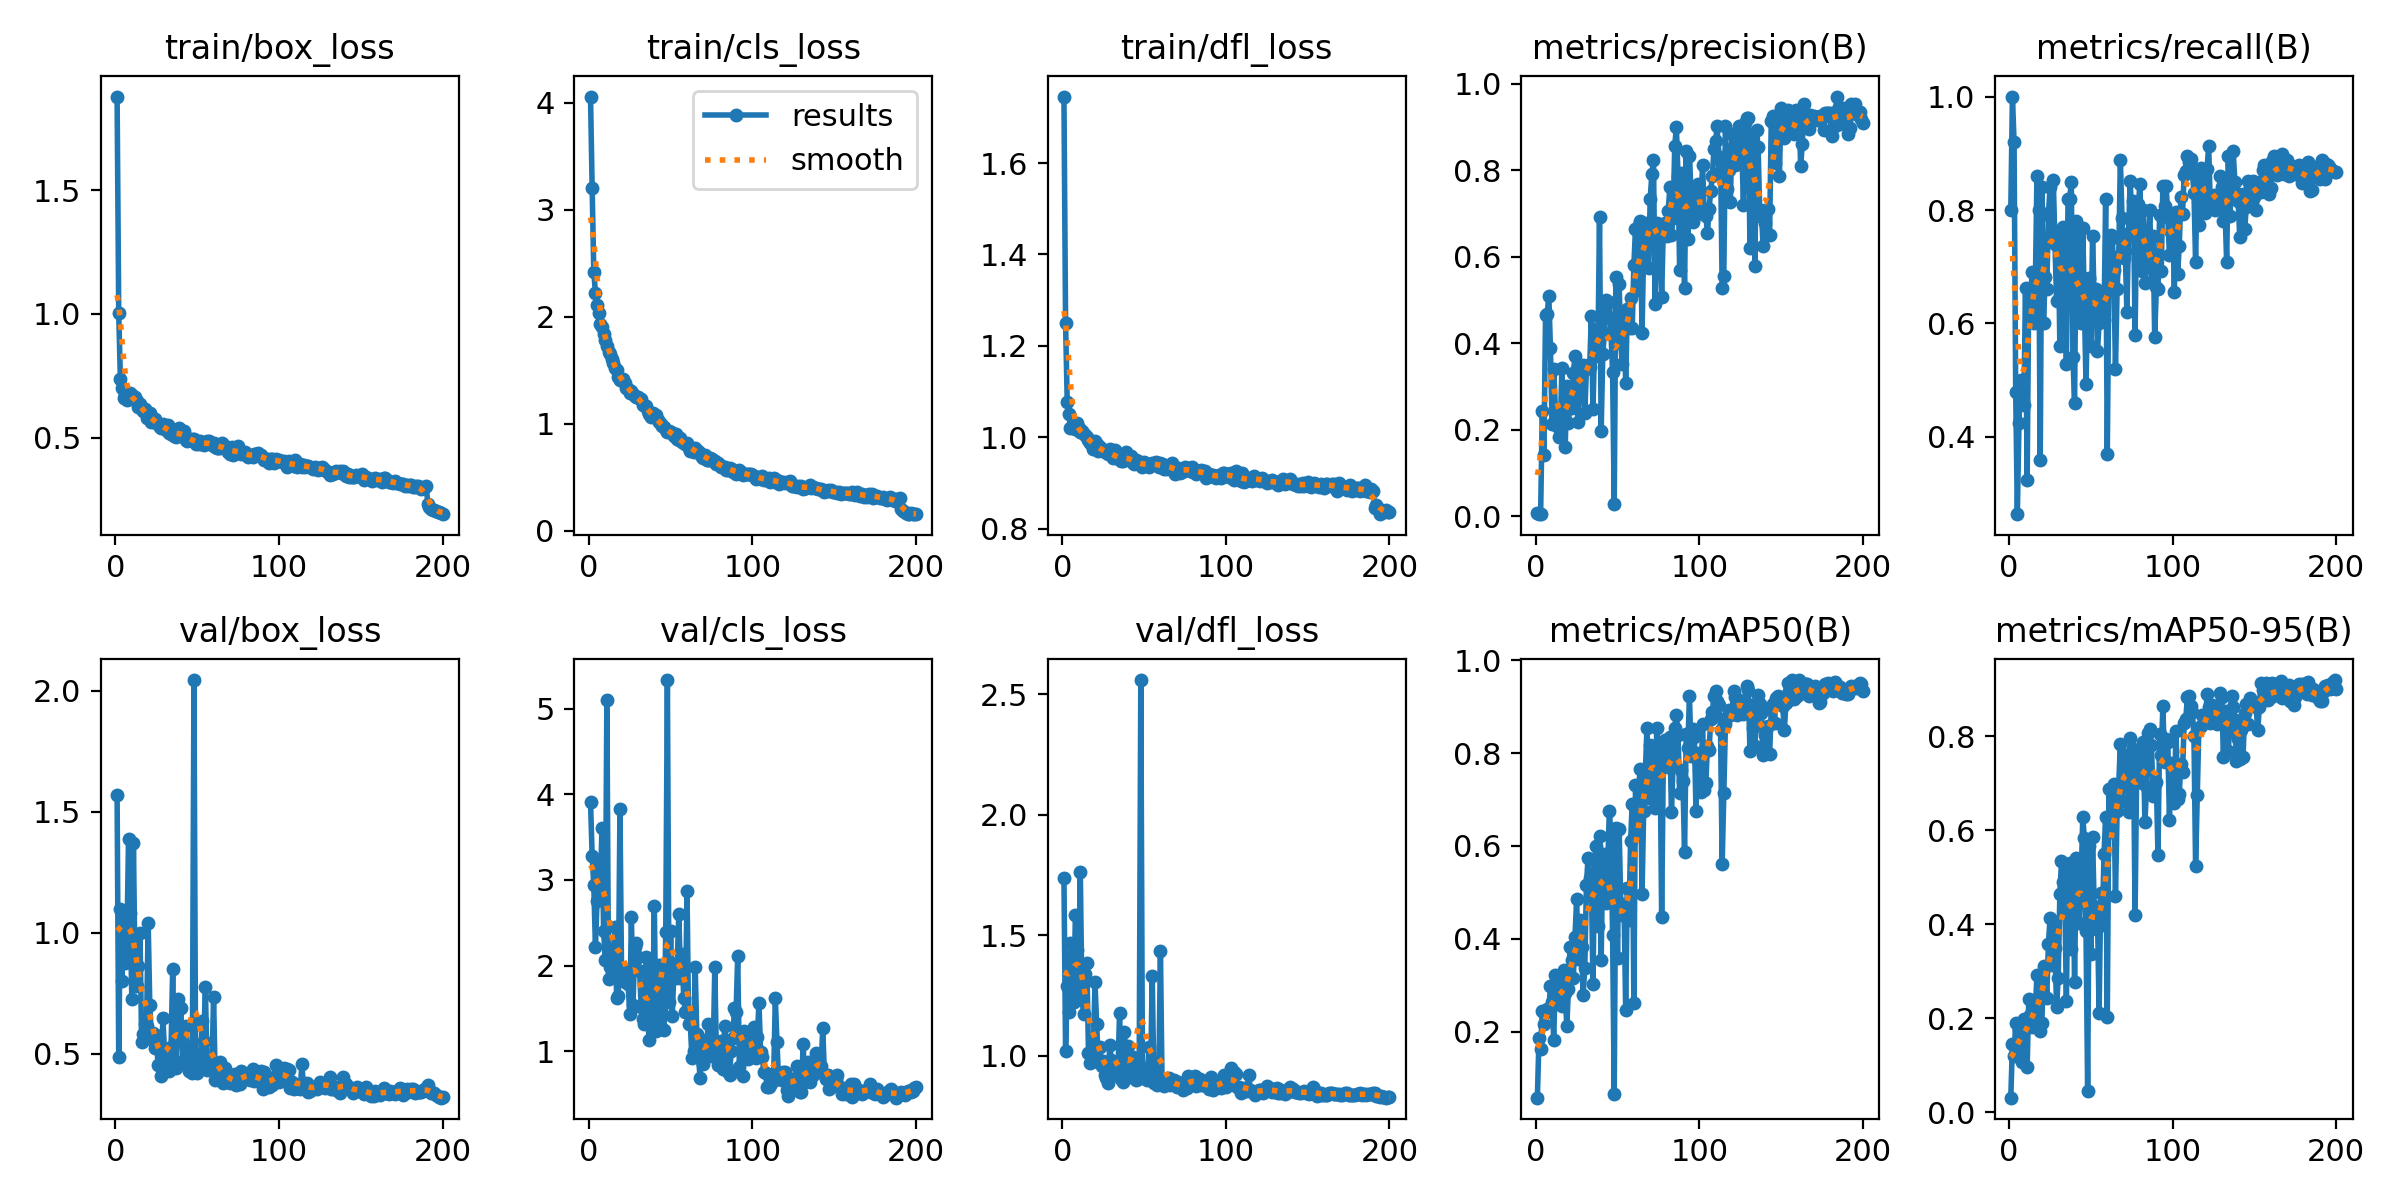

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

## Validate Custom Model

In [ ]:
# %cd /content/drive/MyDrive/skripsi/
%cd {HOME}

!yolo task=detect mode=val model="./runs/detect/train/weights/best.pt" data="D:/datasets/handwriting-big-five/data.yaml"

d:\201402022


Ultralytics YOLOv8.0.196  Python-3.11.7 torch-2.3.0 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs

val: Scanning D:\datasets\handwriting-big-five\valid\labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
val: Scanning D:\datasets\handwriting-big-five\valid\labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/4 [00:00<?, ?it/s]C:\Users\User\miniconda3\envs\ivan\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,

    

## Inference with Custom Model

In [ ]:
# %cd /content/drive/MyDrive/skripsi/
%cd {HOME}
!yolo task=detect mode=predict model="./runs/detect/train/weights/best.pt" conf=0.5 source="D:/datasets/handwriting-big-five/test/images" save=True

d:\201402022


Ultralytics YOLOv8.0.196  Python-3.11.7 torch-2.3.0 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs

image 1/50 D:\datasets\handwriting-big-five\test\images\AGR-19-_jpg.rf.87e1a7029b45167a9de76c2457b2bf5d.jpg: 640x640 1 Agreeableness, 5.0ms
image 2/50 D:\datasets\handwriting-big-five\test\images\AGR-20-_jpg.rf.93695c718e388d7f188ca31459fc1c1a.jpg: 640x640 1 Agreeableness, 3.5ms
image 3/50 D:\datasets\handwriting-big-five\test\images\AGR-21-_jpg.rf.52dba9fe47654521cadfce530ac17d62.jpg: 640x640 1 Agreeableness, 4.0ms
image 4/50 D:\datasets\handwriting-big-five\test\images\AGR-22-_jpg.rf.3aa99b05288364f2e155425dff6b300e.jpg: 640x640 1 Agreeableness, 4.0ms
image 5/50 D:\datasets\handwriting-big-five\test\images\AGR-23-_jpg.rf.0ca24feb1b4be7c7ca966ba88c0728b1.jpg: 640x640 1 Agreeableness, 3.2ms
image 6/50 D:\datasets\handwriting-big-five\test\images\AGR-24-_jpg.rf.cd83340aaaddc67e05cf52aa81a28bf8.jpg: 640x640 1 Agreea

**NOTE:** Let's take a look at few results.

# Export to TF Lite

In [ ]:
!pip install tensorflow==2.13.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 41.8 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.11.0
    Uninstalling typing_extensions-4.11.0:
      Successfully uninstalled typing_extensions-4.11.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: keras
    F

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.13.1


In [ ]:
%cd {HOME}
!yolo export model="./runs/detect/train/weights/best.pt" format=tflite

/content/drive/MyDrive/skripsi
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.30GHz)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/skripsi/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 9, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx', 'onnx2tf>=1.15.4,<=1.17.5', 'sng4onnx>=1.0.1', 'onnxsim>=0.4.33', 'onnx_graphsurgeon>=0.3.26', 'tflite_support', 'onnxruntime'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 106.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 250.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 303.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 282.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

# Inference with TFLite Model

Best 32 Float

In [ ]:
%cd /content/drive/MyDrive/skripsi/
!yolo predict task=detect model=/content/drive/MyDrive/skripsi/runs/detect/train/weights/best_saved_model/best_float32.tflite source=/content/datasets/handwriting-big-five-1/test/images imgsz=640 save=true

/content/drive/MyDrive/skripsi
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Loading /content/drive/MyDrive/skripsi/runs/detect/train/weights/best_saved_model/best_float32.tflite for TensorFlow Lite inference...
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.

image 1/50 /content/datasets/handwriting-big-five-1/test/images/AGR-19-_jpg.rf.87e1a7029b45167a9de76c2457b2bf5d.jpg: 640x640 1 Agreeableness, 291.3ms
image 2/50 /content/datasets/handwriting-big-five-1/test/images/AGR-20-_jpg.rf.93695c718e388d7f188ca31459fc1c1a.jpg: 640x640 1 Agreeableness, 234.9ms
image 3/50 /content/datasets/handwriting-big-five-1/test/images/AGR-21-_jpg.rf.52dba9fe47654521cadfce530ac17d62.jpg: 640x640 1 Agreeableness, 227.7ms
image 4/50 /content/datasets/handwriting-big-five-1/test/images/AGR-22-_jpg.rf.3aa99b05288364f2e155425dff6b300e.jpg: 640x640 1 Agreeableness, 228.2ms
image 5/50 /content/datasets/handwriting-big-five-1/test/images/AGR-23-_jpg.rf.0ca24feb1b

Best 16 Float

In [ ]:
%cd /content/drive/MyDrive/skripsi/
!yolo predict task=detect model=/content/drive/MyDrive/skripsi/runs/detect/train/weights/best_saved_model/best_float16.tflite source=/content/datasets/handwriting-big-five-1/test/images imgsz=640 save=true

/content/drive/MyDrive/skripsi
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Loading /content/drive/MyDrive/skripsi/runs/detect/train/weights/best_saved_model/best_float16.tflite for TensorFlow Lite inference...
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.

image 1/50 /content/datasets/handwriting-big-five-1/test/images/AGR-19-_jpg.rf.87e1a7029b45167a9de76c2457b2bf5d.jpg: 640x640 1 Agreeableness, 176.7ms
image 2/50 /content/datasets/handwriting-big-five-1/test/images/AGR-20-_jpg.rf.93695c718e388d7f188ca31459fc1c1a.jpg: 640x640 1 Agreeableness, 148.3ms
image 3/50 /content/datasets/handwriting-big-five-1/test/images/AGR-21-_jpg.rf.52dba9fe47654521cadfce530ac17d62.jpg: 640x640 1 Agreeableness, 144.9ms
image 4/50 /content/datasets/handwriting-big-five-1/test/images/AGR-22-_jpg.rf.3aa99b05288364f2e155425dff6b300e.jpg: 640x640 1 Agreeableness, 140.3ms
image 5/50 /content/datasets/handwriting-big-five-1/test/images/AGR-23-_jpg.rf.0ca24feb1b